### 선형모형을 사용하는 목적 (선형 회귀)
- 설명변수(x) 값에 대한 반응변수(y) 값을 예측하는 것

- 적합한 회귀선이 만들어지고,
특정 값이 주어지면 반응변수 값이 예측 가능해진다.
-> 그러나 예측 값이 100% 정확하지 않다.

### 왜 예측 값이 정확하지 않은가?
1) 추정된 모형 계수의 불확실성 : 예측된 선형 모델이 정확하지 않다.
2) 개별 데이터의 무작위 오차 발생

-> 그러므로 예측은 구간 추정으로 하는 것이 적절하다.

### 설명 변수의 특정 값의 구간 추정 방법
- 평균 반응에 대한 신뢰구간(CI)
- 개별 반응에 대한 예측구간(PI)

대부분의 데이터는 95% 신뢰구간을 벗어나는데,
이는 신뢰구간은 개별 값이 아닌 모집단의 평균값에 대한 것이기 때문이다.

대신 예측 구간은 대부분의 데이터를 포함한다.

In [2]:
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


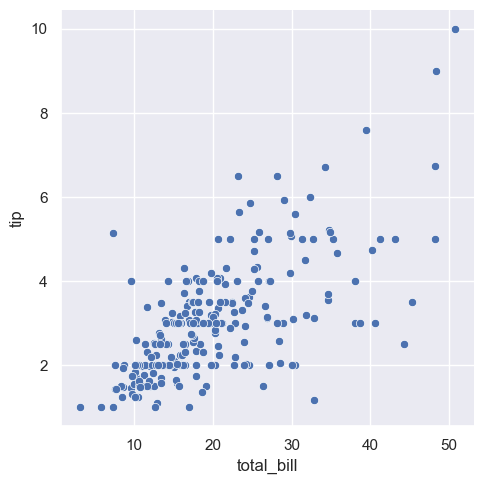

In [3]:
# 산점도 : 두 변수간의 연관성을 분석하는 전통적인 방법
# 아래 산점도 결과 -> 두 변수는 양의 상관관계가 있다.

sns.relplot(x="total_bill" , y ='tip', data = tips)

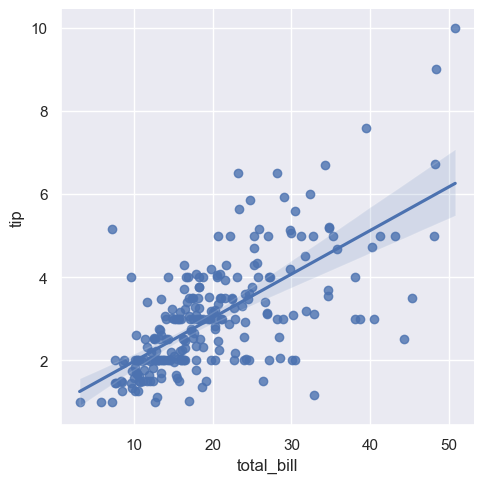

In [4]:
# 95% 신뢰구간표현하기
#ci = 68
ax = sns.lmplot(x="total_bill" , y ='tip', data = tips, ci = 95)    # 옵션 ci

### 해석 방법

#### 1) 모집단의 평균 예측 (CI 에 대한 해석)
- 회귀식에 따라 total_bill 이 40일 때, tip의 점추정치는 5이고,
- tip의 평균값이 4.5~5.5 라는 것을 95% 신뢰한다 고 해석한다.

##### 2) 종속 변수의 개별 관찰에 대한 예측 (PI 에 대한해석) 
- total_bill 이 40일 떄, 기대할 수 있는(미래의) tip의 점추정치는 40이고,
- 이러한 점추정치가 00~00 범위에 해당하는 것을 95% 신뢰한다 고 해석한다.

#### 참고(논문) : "상관성과 단순선형회귀분석"(박선일 외, 2010)
 ![nn](regression_240708.png)

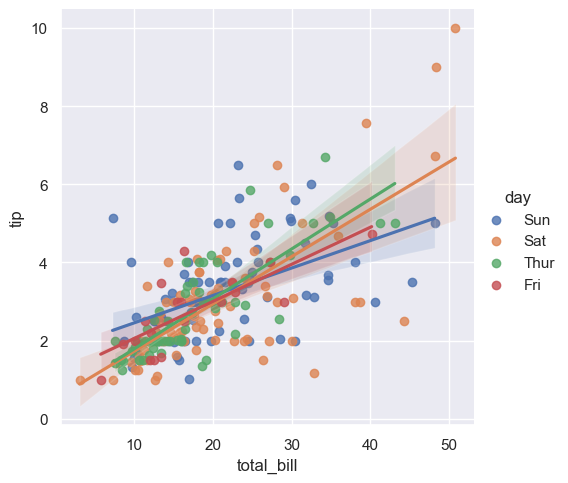

In [5]:
# makers = ["o", "x"]
ax = sns.lmplot(x="total_bill" , y ='tip', data = tips,
                 ci = 95, hue ="day")

In [6]:
# hue 에 필요한 조건을 선정하여 o/x에 따른 상관관계분석
# 요일별 팁 액수와의 상관관계
# 흡연 여부에 따른 상관관계


In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


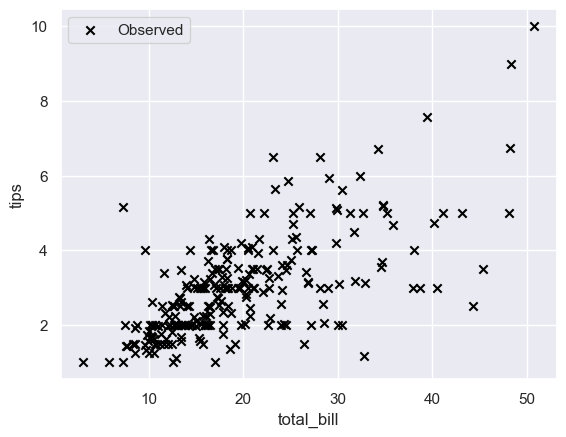

In [9]:
# 출처 :  https://lmc2179.github.io/posts/confidence_prediction.html

plt.scatter(tips['total_bill'], tips['tip'], label='Observed', marker='x', color='black')
plt.xlabel('total_bill')
plt.ylabel('tips')
plt.legend()
plt.show()

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('tip ~ total_bill', tips)
results = model.fit()

alpha = .05       # 95% 신뢰구간

predictions = results.get_prediction(tips).summary_frame(alpha)    # 선형회귀 

In [20]:
predictions.head()     # 각 평균값에 대한 CI 값의 상/하한 계산(예측) 결과

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.704636,0.068594,2.569519,2.839753,0.686862,4.722410
1,2.006223,0.095502,1.818101,2.194345,-0.015792,4.028238
2,3.126835,0.066048,2.996732,3.256937,1.109390,5.144279
3,3.407250,0.071439,3.266528,3.547972,1.389093,5.425407
4,3.502822,0.074383,3.356301,3.649344,1.484253,5.521392


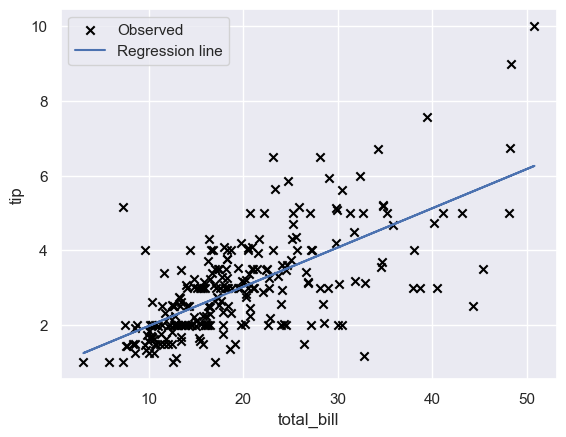

In [15]:
plt.scatter(tips['total_bill'], tips['tip'], label='Observed', marker='x', color='black')
plt.plot(tips['total_bill'], predictions['mean'], label='Regression line')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()
plt.show()

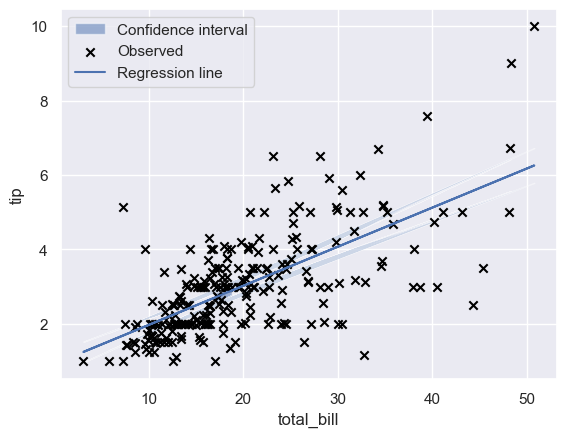

In [23]:
# Confidence Interval

plt.fill_between(tips['total_bill'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], alpha=.5, label='Confidence interval')
plt.scatter(tips['total_bill'], tips['tip'], label='Observed', marker='x', color='black')
plt.plot(tips['total_bill'], predictions['mean'], label='Regression line')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()
plt.show()

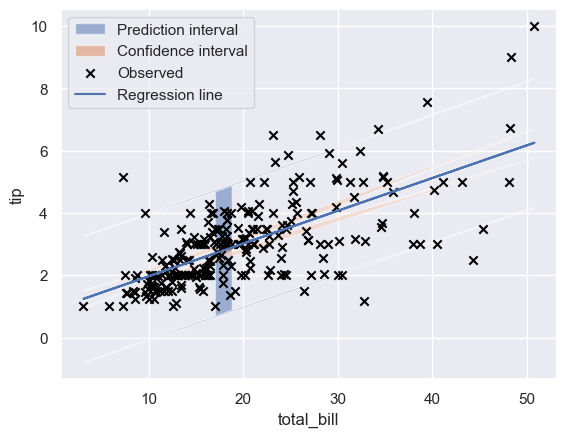

In [26]:
# Prediction Interval
plt.fill_between(tips['total_bill'], predictions['obs_ci_lower'], predictions['obs_ci_upper'], alpha=.5, label='Prediction interval')

# Confidence Interval
plt.fill_between(tips['total_bill'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], alpha=.5, label='Confidence interval')

plt.scatter(tips['total_bill'], tips['tip'], label='Observed', marker='x', color='black')
plt.plot(tips['total_bill'], predictions['mean'], label='Regression line')

plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()

plt.show()

### 참고 문헌
- "상관성과 단순선형회귀 분석"(2010)
- https://www.statsmodels.org/stable/index.html
- https://lmc2179.github.io/posts/confidence_prediction.html